# Introducción a pandas

Parte de la serie de conferencias cuánticas:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Cuaderno publicado bajo la licencia Creative Commons Attribution 4.0.

pandas es una biblioteca de Python que proporciona una colección de estructuras de datos potentes para ayudarlo a administrar los datos. En esta conferencia, cubriremos cómo usar los objetos Series y DataFrame para manejar datos. Estos objetos tienen una fuerte integración con NumPy, cubiertos en otras partes de la serie de conferencias, lo que nos permite hacer fácilmente los cálculos matemáticos y estadísticos necesarios que necesitamos para las finanzas.
[lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy)

In [1]:
# librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Con pandas, es fácil almacenar, visualizar y realizar cálculos en sus datos. Con solo unas pocas líneas de código, podemos modificar nuestros datos y presentarlos de una manera fácil de entender. Aquí simulamos algunos retornos en NumPy, los colocamos en un DataFrame de pandas y realizamos cálculos para convertirlos en precios y trazarlos, todos usando solo unas pocas líneas de código.

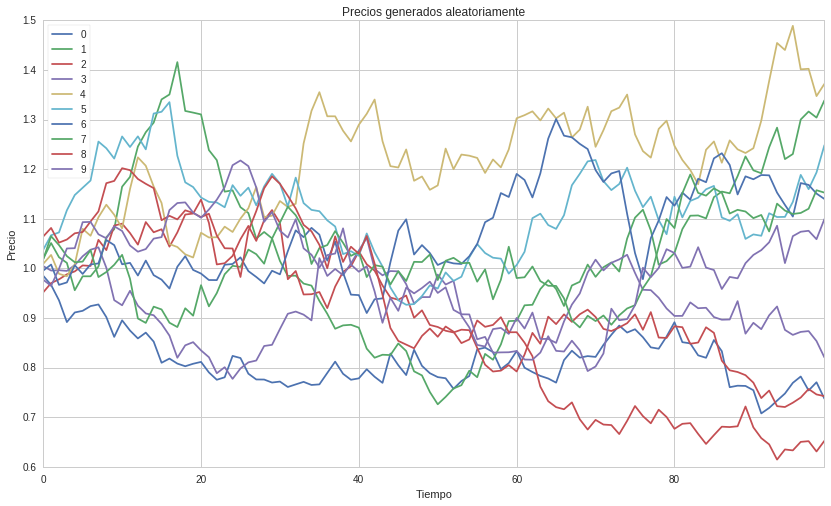

In [2]:
# grafica de precios aleatorios
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Precios generados aleatoriamente')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(loc=0);

¡Echemos un vistazo a cómo construimos hasta este punto!

## Estructuras de Datos Panda

### Serie

Una serie de pandas es una matriz de 1 dimensión con etiquetas que pueden contener cualquier tipo de datos. Principalmente los usamos para manejar datos de series temporales. Crear una serie es tan fácil como llamar a pandas.Series () en una lista de Python o una matriz NumPy.

In [3]:
# creamos la serie
s = pd.Series([1, 2, np.nan, 4, 5])
print s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Cada serie tiene un nombre. Podemos darle a la serie un nombre como parámetro o podemos definirlo luego accediendo directamente al atributo de nombre. En este caso, le hemos dado a nuestra serie de tiempo ningún nombre por lo que el atributo debe estar vacío.

In [4]:
# por el momento nuestra serie no tiene ningun nombre
print s.name

None


Este nombre se puede modificar directamente sin repercusiones.

In [30]:
# asignamos un nombre
s.name = "Toy Series"
print s.name

Toy Series


Llamamos a las etiquetas de ejes recogidos de una serie su índice. Un índice puede pasarse a una serie como parámetro o agregarse más tarde, de forma similar a su nombre. En ausencia de un índice, una Serie simplemente contendrá un índice compuesto de números enteros, comenzando en 0, como en el caso de nuestra "Serie de Juguetes".

In [5]:
# muestra el indice de la serie
print s.index

RangeIndex(start=0, stop=5, step=1)


pandas tiene una función incorporada específicamente para crear índices de fecha, date_range (). Usamos la función aquí para crear un nuevo índice para s.

In [21]:
# creamos un indice de fecha
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


Un índice debe tener exactamente la misma longitud que la propia serie. Cada índice debe coincidir uno a uno con cada elemento de la Serie. Una vez que esto esté satisfecho, podemos modificar directamente el índice de la serie, como con el nombre, para usar nuestro índice nuevo y más informativo (en términos relativos).

In [22]:
# modificamos el indice de la serie
s.index = new_index
print s.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


El índice de la serie es crucial para el manejo de series temporales, que veremos un poco más adelante.

### Acceder a elementos de la serie

Por lo general, se accede a la serie utilizando los métodos iloc [] y loc []. Usamos iloc [] para acceder a los elementos por índice entero y usamos loc [] para acceder al índice de la serie.

In [38]:
# iloc[]: acceder a los elementos por indice entero
# loc[]: acceder al indice de la serie
print "Primer elemento de la serie: ", s.iloc[0]
print "Ultimo elemento de la serie: ", s.iloc[len(s)-1]

Primer elemento de la serie:  1.0
Ultimo elemento de la serie:  5.0


Podemos dividir una serie de forma similar a nuestras colecciones favoritas, listas de Python y matrices NumPy. Usamos el operador de dos puntos para indicar la porción.

In [37]:
# particionamos la serie
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

Al crear un segmento, tenemos la opción de especificar un principio, un final y un paso. El segmento comenzará en el índice de inicio y dará los pasos de paso de tamaño hasta que pase el índice final, sin incluir el final.

In [36]:
start = 0
end = len(s) - 1  # no muestra la ultima posicion
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

Incluso podemos invertir una Serie especificando un tamaño de paso negativo. Del mismo modo, podemos indexar el inicio y el final con un valor entero negativo.

In [35]:
# invertir la serie
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

Esto devuelve una porción de la serie que comienza del penúltimo elemento y termina en el penúltimo elemento (porque el penúltimo no está incluido, tomando pasos de tamaño 1).

In [34]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

También podemos acceder a una serie usando los valores de su índice. Dado que indexamos s con una colección de fechas (objetos Timestamp) podemos mirar el valor contenido en s para una fecha particular.

In [23]:
# accedemos a una serie usando los valores de su indice
s.loc['2016-01-01']

1.0

¡O incluso para una variedad de fechas!

In [33]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

Con Series, podemos usar los corchetes ([]) para acceder a los elementos, pero esta no es la mejor práctica. Los corchetes son ambiguos porque se pueden usar para acceder a Series (y DataFrames) usando valores de índice y de valores enteros, y los resultados cambiarán en función del contexto (especialmente con DataFrames).

#### Indexación Booleana

Además de los métodos de acceso mencionados anteriormente, puede filtrar Series utilizando matrices booleanas. Las series son compatibles con sus comparadores estándar. Una vez que se compara con la condición que se desee, recupera otra serie, esta vez llena de valores booleanos.

In [32]:
print s < 3

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


Podemos volver a pasar esta serie a la serie original para filtrar solo los elementos para los cuales nuestra condición es verdadera.

In [31]:
print s.loc[s < 3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


Si lo deseamos, podemos agrupar varias condiciones utilizando los operadores lógicos &, |, y ~ (y, o, y no, respectivamente).

In [39]:
print s.loc[(s < 3) & (s > 1)]

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


Esto es muy conveniente para obtener solo elementos de una serie que satisfagan los criterios específicos que necesitamos. Se vuelve aún más conveniente cuando manejamos DataFrames.

#### Indexación y Serie de tiempo

Como usamos Series para manejar series de tiempo, vale la pena cubrir un poco de cómo manejamos el componente de tiempo. Para nuestros propósitos, usamos objetos pandas Timestamp. Vamos a sacar una serie de tiempo completo, completa con todas las etiquetas apropiadas, utilizando nuestro método get_pricing (). Todos los datos extraídos con get_pricing () o utilizando nuestra API Pipeline estarán en formato Series o DataFrame. Podemos modificar este índice como queramos.

In [43]:
# serie de tiempo completo
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
# get_pricing: obtiene datos de los dias de mercado
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
print prices

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
2012-01-13 00:00:00+00:00    354.390
2012-01-17 00:00:00+00:00    353.610
2012-01-18 00:00:00+00:00    356.820
2012-01-19 00:00:00+00:00    358.100
2012-01-20 00:00:00+00:00    356.370
2012-01-23 00:00:00+00:00    360.530
2012-01-24 00:00:00+00:00    360.600
2012-01-25 00:00:00+00:00    363.280
2012-01-26 00:00:00+00:00    366.180
2012-01-27 00:00:00+00:00    366.800
2012-01-30 00:00:00+00:00    367.940
2012-01-31 00:00:00+00:00    367.580
2012-02-01 00:00:00+00:00    370.840
2012-02-02 00:00:00+00:00    362.640
2012-02-03 00:00:00+00:00    372.000
2012-02-06 00:00:00+00:00    371.650
2012-02-07 00:00:00+00:00    373.930
2012-02-08 00:00:00+00:00    373.810
2012-02-09 00:00:00+00:00    376.500
2

Podemos mostrar los primeros elementos de nuestra serie utilizando el método head () y especificando la cantidad de elementos que queremos. El método análogo para los últimos elementos es tail ().

In [45]:
# head: mostrar los primeros 5 elementos de nuestra serie
print "\n", type(prices)
prices.head(5) 


<class 'pandas.core.series.Series'>


2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

Al igual que con nuestro ejemplo de juguete, podemos especificar un nombre para nuestra serie temporal, aunque solo sea para aclarar el nombre que nos proporciona get_pricing ().

In [46]:
print 'Viejo nombre: ', prices.name
prices.name = symbol
print 'Nuevo nombre: ', prices.name

Viejo nombre:  Equity(28016 [CMG])
Nuevo nombre:  CMG


Echemos un vistazo más de cerca al DatetimeIndex de nuestra serie temporal de precios.

In [47]:
print prices.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


Tenga en cuenta que este DatetimeIndex tiene una colección de información asociada. En particular, tiene una frecuencia asociada (freq) y una zona horaria asociada (tz). La frecuencia indica si los datos son diarios frente a mensuales versus algún otro período, mientras que la zona horaria indica en qué entorno local se relaciona este índice. ¡Podemos modificar toda esta información adicional!

Si realizamos una nueva muestra de nuestra serie, podemos ajustar la frecuencia de nuestros datos. Actualmente tenemos datos diarios (sin incluir los fines de semana) porque get_pricing () solo obtiene datos de los días de mercado. Vamos a muestrear desde estos datos diarios a datos mensuales usando el método remuest ().monthly_prices = prices.resample ('M')

In [91]:
# muestrea desde estos datos diarios a datos mensuales
monthly_prices = prices.resample('M')
monthly_prices.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  This is separate from the ipykernel package so we can avoid doing imports until


2012-01-31 00:00:00+00:00    354.812100
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996182
2012-04-30 00:00:00+00:00    422.818500
2012-05-31 00:00:00+00:00    405.811091
2012-06-30 00:00:00+00:00    403.068571
2012-07-31 00:00:00+00:00    353.849619
2012-08-31 00:00:00+00:00    294.516522
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545333
Freq: M, Name: CMG, dtype: float64

El método resample () utiliza de forma predeterminada la media de los datos de nivel inferior para crear los datos de nivel superior. Podemos especificar de qué otra manera podemos querer que se calcule el up-sampling especificando el parámetro how.

In [92]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

Incluso podemos especificar cómo queremos que se realice el cálculo del nuevo período. Aquí creamos una función custom_resampler () que devolverá el primer valor del período. En nuestro caso específico, esto devolverá una serie donde el valor mensual es el primer valor de ese mes.

In [93]:
def custom_resampler(array_like):
    """ Devuelve el primer valor del período """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

También podemos ajustar la zona horaria de una serie para adaptar el tiempo de los datos del mundo real. En nuestro caso, nuestra serie temporal ya está localizada en UTC, pero digamos que queremos ajustar la hora para que sea 'US / Eastern'. En este caso, usamos el método tz_convert (), ya que la hora ya está localizada.

In [94]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2012-01-02 19:00:00-05:00    340.980
2012-01-03 19:00:00-05:00    348.740
2012-01-04 19:00:00-05:00    349.990
2012-01-05 19:00:00-05:00    348.950
2012-01-08 19:00:00-05:00    339.522
2012-01-09 19:00:00-05:00    340.700
2012-01-10 19:00:00-05:00    347.330
2012-01-11 19:00:00-05:00    347.830
2012-01-12 19:00:00-05:00    354.390
2012-01-16 19:00:00-05:00    353.610
Freq: C, Name: CMG, dtype: float64

Además de la capacidad para la administración de la zona horaria y la frecuencia, cada serie de tiempo tiene incorporado un método de reindex () que podemos usar para realinear los datos existentes de acuerdo con un nuevo conjunto de etiquetas de índice. Si no existen datos para una etiqueta en particular, los datos se llenarán con un valor de marcador de posición. Esto es típicamente np.nan, aunque podemos proporcionar un método de relleno.

Los datos que obtenemos get_pricing () solo incluyen días de mercado. Pero, ¿y si queremos precios para cada día calendario? Esto incluirá vacaciones y fines de semana, momentos en los que normalmente no puede negociar acciones. Primero, creemos un nuevo DatetimeIndex que contenga todo lo que queramos.

In [95]:
# crea un DatetimeIndex
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


Ahora usemos este nuevo conjunto de fechas para reindexar nuestra serie temporal. Le decimos a la función que el método de llenado que queremos es completo. Esto denota "llenado hacia adelante". Cualquier valor de NaN se completará con el último valor listado. Por lo tanto, el precio del fin de semana o de vacaciones se indicará como el precio del último día de mercado que conocemos.

In [96]:
# reindexamos nuestra serie temporal
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00        NaN
2012-01-02 00:00:00+00:00        NaN
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
2012-01-13 00:00:00+00:00    354.390
2012-01-14 00:00:00+00:00    354.390
2012-01-15 00:00:00+00:00    354.390
Freq: D, Name: CMG, dtype: float64

Notarás que todavía tenemos un par de valores NaN justo al comienzo de nuestra serie temporal. Esto se debe a que el primero de enero de 2012 fue un domingo y el segundo fue un feriado de mercado. Debido a que estos son los puntos de datos más antiguos y no tenemos ninguna información antes que ellos, no se pueden reenviar. Nos ocuparemos de estos valores de NaN en la siguiente sección, cuando tratemos con datos faltantes.

#### Datos perdidos

Cada vez que manejamos datos reales, hay una posibilidad muy real de encontrar valores perdidos. Los datos reales están plagados de agujeros y los pandas nos proporcionan formas de manejarlos. A veces, el remuestreo o reindexación puede crear valores NaN. Afortunadamente, los pandas nos proporcionan formas de manejarlos. Tenemos dos medios principales para hacer frente a los datos que faltan. El primero de ellos es completar los datos faltantes con fillna (). Por ejemplo, supongamos que queremos completar los días faltantes con el precio medio de todos los días.

In [97]:
# completamos datos faltantes con fillna()
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.05836
2012-01-02 00:00:00+00:00    501.05836
2012-01-03 00:00:00+00:00    340.98000
2012-01-04 00:00:00+00:00    348.74000
2012-01-05 00:00:00+00:00    349.99000
2012-01-06 00:00:00+00:00    348.95000
2012-01-07 00:00:00+00:00    348.95000
2012-01-08 00:00:00+00:00    348.95000
2012-01-09 00:00:00+00:00    339.52200
2012-01-10 00:00:00+00:00    340.70000
Freq: D, Name: CMG, dtype: float64

Usar fillna () es bastante fácil. Solo se trata de indicar el valor con el que desea llenar los espacios. Desafortunadamente, este caso particular no tiene mucho sentido, por las razones discutidas en la conferencia sobre estacionariedad en la serie de Conferencias. Podríamos llenarlos con 0, simplemente, pero eso es igualmente desinformativo. [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity)

En lugar de completar los valores específicos, podemos usar el parámetro del método, de forma similar a cómo funciona el método reindex (). Podríamos usar "relleno hacia atrás", donde los NaN se llenan con el siguiente valor lleno (en lugar del último valor lleno del envío hacia adelante) como sigue:

In [98]:
# usamos "relleno hacia atras"
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    340.980
2012-01-02 00:00:00+00:00    340.980
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
Freq: D, Name: CMG, dtype: float64

Pero, de nuevo, esta es una mala idea por las mismas razones que la opción anterior. Ambas soluciones conocidas tienen en cuenta los datos futuros que no estaban disponibles en el momento de los puntos de datos que intentamos llenar. En el caso de utilizar la media o la mediana, estas estadísticas de resumen se calculan teniendo en cuenta toda la serie temporal. El relleno hacia atrás equivale a decir que el precio de un valor en particular hoy, en este momento, el precio de mañana. Esto tampoco tiene sentido. Estas dos opciones son ejemplos de sesgo de anticipación, el uso de datos que serían desconocidos o no estarían disponibles en el momento deseado, y deberían evitarse.

Nuestra próxima opción es significativamente más atractiva. Simplemente podríamos soltar los datos faltantes utilizando el método dropna (). Esta es una alternativa mucho mejor que llenar los valores de NaN con números arbitrarios.

In [99]:
#  utilizamos el metodo dropna()
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
Freq: D, Name: CMG, dtype: float64

Ahora nuestra serie de tiempo se limpia para el año calendario, con todos nuestros valores NaN correctamente manejados. Es hora de hablar sobre cómo hacer análisis de series de tiempo con estructuras de datos de pandas.

#### Análisis de series temporales con pandas

Hagamos un análisis básico de series de tiempo sobre nuestros precios originales. Cada serie de pandas tiene un método de trazado incorporado.

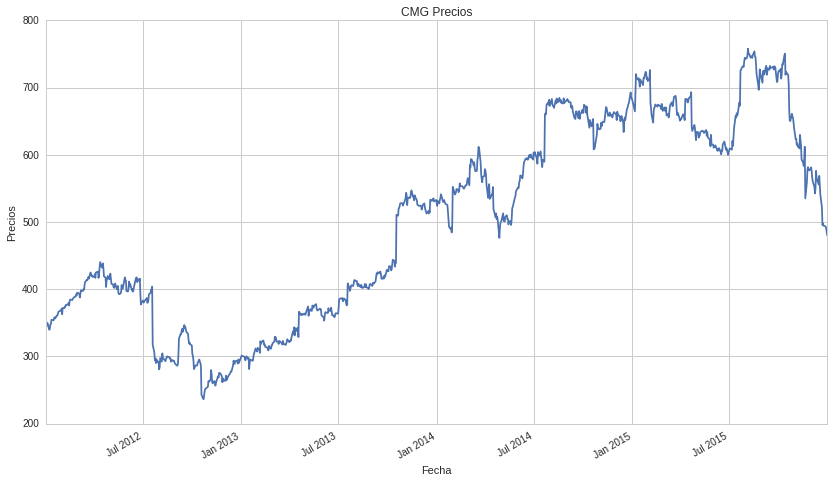

In [100]:
# grafica
prices.plot();
# Todavía tenemos que agregar las etiquetas de los ejes y el título de nosotros mismos
plt.title(symbol + " Precios")
plt.ylabel("Precios")
plt.xlabel("Fecha");

Además de algunas estadísticas descriptivas integradas. Podemos calcular estos individualmente o usando el método de la descripción ().

In [101]:
# calcula la media y la desviacion estandar
print "Media: ", prices.mean()
print "Desviacion estandar: ", prices.std()

Media:  501.637439364
Desviacion estandar:  146.697204146


In [103]:
# Estadisticas descriptivas integradas a traves del metodo describe()
print "Estadísticas de resumen"
print prices.describe()

Estadísticas de resumen
count    1006.000000
mean      501.637439
std       146.697204
min       236.240000
25%       371.605000
50%       521.280000
75%       646.753750
max       757.770000
Name: CMG, dtype: float64


Podemos modificar fácilmente Series con escalares utilizando nuestros operadores matemáticos básicos.

In [104]:
# escalares
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-03 00:00:00+00:00    671.960
2012-01-04 00:00:00+00:00    687.480
2012-01-05 00:00:00+00:00    689.980
2012-01-06 00:00:00+00:00    687.900
2012-01-09 00:00:00+00:00    669.044
Freq: C, Name: CMG, dtype: float64

Y podemos crear combinaciones lineales de Series usando los operadores matemáticos básicos. los pandas agruparán los índices coincidentes y realizarán los cálculos en forma de elemento para producir una nueva serie.

In [105]:
# combinacion lineal
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2012-01-03 00:00:00+00:00    335.708713
2012-01-04 00:00:00+00:00    371.741224
2012-01-05 00:00:00+00:00    365.193536
2012-01-06 00:00:00+00:00    369.236243
2012-01-09 00:00:00+00:00    366.422543
Freq: C, dtype: float64

Sin embargo, si no hay índices que concuerden, podemos obtener una Serie vacía a cambio.

In [106]:
# serie vacia, pues no hay indices
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

En lugar de mirar una serie temporal en sí misma, es posible que deseemos ver sus diferencias de primer orden o cambio porcentual (para obtener retornos adicionales o multiplicativos, en nuestro caso particular). Ambos son métodos integrados.

In [107]:
# diferencias de cambio porcentual
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]
print add_returns
print mult_returns

2012-01-04 00:00:00+00:00     7.760
2012-01-05 00:00:00+00:00     1.250
2012-01-06 00:00:00+00:00    -1.040
2012-01-09 00:00:00+00:00    -9.428
2012-01-10 00:00:00+00:00     1.178
2012-01-11 00:00:00+00:00     6.630
2012-01-12 00:00:00+00:00     0.500
2012-01-13 00:00:00+00:00     6.560
2012-01-17 00:00:00+00:00    -0.780
2012-01-18 00:00:00+00:00     3.210
2012-01-19 00:00:00+00:00     1.280
2012-01-20 00:00:00+00:00    -1.730
2012-01-23 00:00:00+00:00     4.160
2012-01-24 00:00:00+00:00     0.070
2012-01-25 00:00:00+00:00     2.680
2012-01-26 00:00:00+00:00     2.900
2012-01-27 00:00:00+00:00     0.620
2012-01-30 00:00:00+00:00     1.140
2012-01-31 00:00:00+00:00    -0.360
2012-02-01 00:00:00+00:00     3.260
2012-02-02 00:00:00+00:00    -8.200
2012-02-03 00:00:00+00:00     9.360
2012-02-06 00:00:00+00:00    -0.350
2012-02-07 00:00:00+00:00     2.280
2012-02-08 00:00:00+00:00    -0.120
2012-02-09 00:00:00+00:00     2.690
2012-02-10 00:00:00+00:00    -0.110
2012-02-13 00:00:00+00:00   

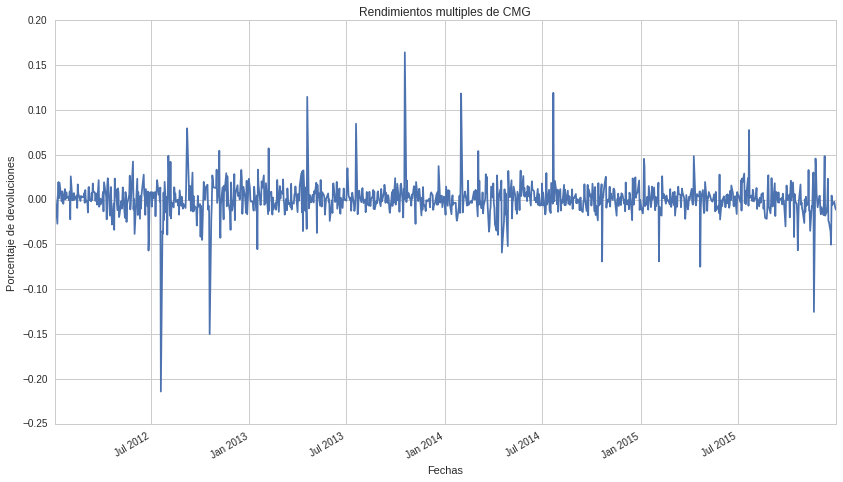

In [108]:
# grafica
plt.title("Rendimientos multiples de " + symbol)
plt.xlabel("Fechas")
plt.ylabel("Porcentaje de devoluciones")
mult_returns.plot();

pandas tiene funciones convenientes para calcular los medios de rodadura y las desviaciones estándar, ¡también!

In [109]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


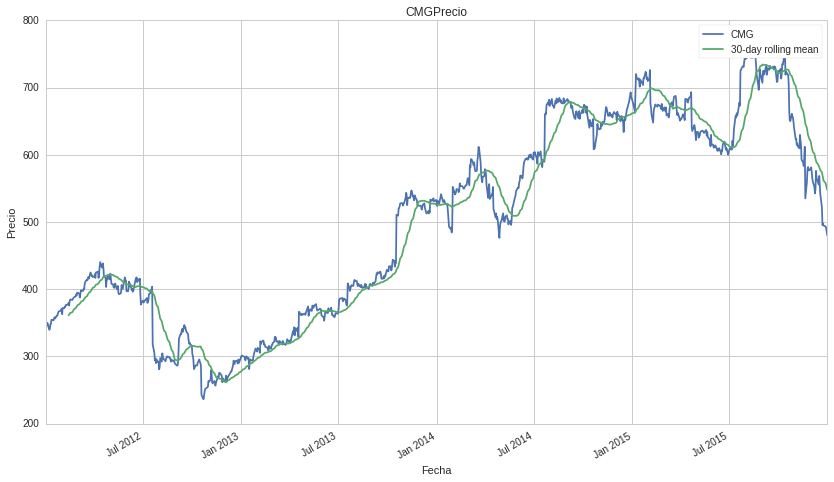

In [110]:
# grafica
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Precio")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

In [111]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "Volatilidad de 30 días"

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  """Entry point for launching an IPython kernel.


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 19: ordinal not in range(128)

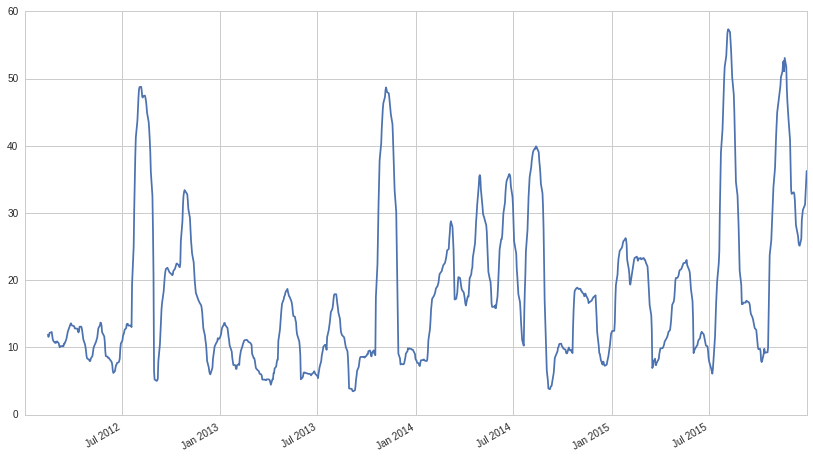

In [114]:
# grafica
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Fecha")
plt.ylabel("Desviacion estandar");

Muchas funciones de NumPy funcionarán en Series del mismo modo que funcionan en matrices NumPy de 1 dimensión.

In [115]:
# calcula la mediana
print np.median(mult_returns)

0.000160446683567


La mayoría de estas funciones, sin embargo, ya están implementadas directamente como métodos de Series y DataFrame.

In [116]:
# calcula la mediana
print mult_returns.median()

0.000160446683567


En todos los casos, usar el método de pandas integrado será mejor que usar la función NumPy en una estructura de datos de pandas debido a las mejoras en el rendimiento. Asegúrese de consultar la documentación de la Serie antes de recurrir a otros cálculos de funciones comunes. [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

### `DataFrames`

Muchos de los aspectos de trabajar con Series se transfieren a DataFrames. pandas DataFrames nos permite administrar fácilmente nuestros datos con su estructura intuitiva.

Muchos de los aspectos de trabajar con Series se transfieren a DataFrames. pandas DataFrames nos permite administrar fácilmente nuestros datos con su estructura intuitiva. [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html)

Podemos crear un DataFrame llamando a pandas.DataFrame () en un diccionario o NumPy ndarray. También podemos concatenar un grupo de pandas Series en un DataFrame usando pandas.concat ().

In [118]:
# creamos un DataFrame con ayuda de un diccionario
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

{'a': [1, 2, 3, 4, 5], 'c': array([-0.0071207 ,  1.6122386 ,  0.81474401, -0.71209181, -0.4584259 ]), 'b': ['L', 'K', 'J', 'M', 'Z']}


Cada DataFrame tiene algunos atributos clave que debemos tener en cuenta. El primero de ellos es el atributo de índice. Podemos incluir fácilmente un índice de objetos Timestamp como lo hicimos con Series.

In [119]:
# incluimos un indice de objetos Timestamp
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data

            a  b         c
2016-01-01  1  L -0.007121
2016-01-02  2  K  1.612239
2016-01-03  3  J  0.814744
2016-01-04  4  M -0.712092
2016-01-05  5  Z -0.458426


Como se mencionó anteriormente, podemos combinar Series en DataFrames. Las series concatenatorias como esta coincidirán con los elementos según su índice correspondiente. Como las siguientes Series no tienen un índice asignado, cada una de ellas se predetermina a un índice entero.

In [120]:
# combinamos series (concatenamos)
s_1 = pd.Series([2, 4, 6, 8, 10], name='Pares')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Impares")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

   Pares  Impares
0      2        1
1      4        3
2      6        5
3      8        7
4     10        9


Usaremos pandas.concat () de nuevo más tarde para combinar múltiples DataFrames en uno.

Cada DataFrame también tiene un atributo de columnas. Estos pueden ser asignados cuando llamamos a pandas.DataFrame o pueden ser modificados directamente como el índice. Tenga en cuenta que cuando concatenamos las dos Series anteriores, los nombres de las columnas fueron los nombres de esas Series.

In [122]:
# con DataFrame tambien hay un atributo de columnas
print numbers.columns

Index([u'Pares', u'Impares'], dtype='object')


Para modificar las columnas después de la creación del objeto, solo necesitamos hacer lo siguiente:

In [123]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


En la misma línea, el índice de un DataFrame se puede cambiar después del hecho.

In [124]:
print numbers.index

RangeIndex(start=0, stop=5, step=1)


In [125]:
# cambiamos el indice del DataFrame
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separado de las columnas y el índice de un DataFrame, también podemos acceder directamente a los valores que contienen mirando el atributo de valores.

In [126]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

Esto devuelve una matriz NumPy.

In [127]:
type(numbers.values)

<type 'numpy.ndarray'>

#### Acceder a elementos del DataFrame

De nuevo, vemos un gran remanente de la Serie en la forma en que accedemos a los elementos de DataFrames. El punto clave aquí es que todo tiene que tener en cuenta las múltiples dimensiones ahora. La principal forma de que esto ocurra es a través del acceso de las columnas de un DataFrame, ya sea individualmente o en grupos. Podemos hacer esto accediendo directamente a los atributos o utilizando los métodos con los que ya estamos familiarizados.

In [129]:
# accedemos a los elementos
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
    print prices.columns
else:
    prices.name = symbol
    print prices.name

Index([u'CMG', u'MCD', u'SHAK', u'WFM'], dtype='object')


Aquí accedemos directamente a la columna CMG. Tenga en cuenta que este estilo de acceso solo funcionará si el nombre de su columna no tiene espacios ni caracteres hostiles.

In [131]:
# accedemos a la columna CMG
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

También podemos usar loc [] para acceder a una columna individual como tal.

In [132]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

El acceso a una columna individual devolverá una serie, independientemente de cómo lo obtengamos.

In [133]:
print type(prices.CMG)
print type(prices.loc[:, 'CMG'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Observe cómo pasamos una tupla en el método loc []? Esta es una diferencia clave entre acceder a una serie y acceder a un DataFrame, basado en el hecho de que un DataFrame tiene múltiples dimensiones. Cuando pasa una tupla bidimensional a un DataFrame, el primer elemento de la tupla se aplica a las filas y el segundo se aplica a las columnas. Por lo tanto, para desglosarlo, la línea de código anterior le dice al DataFrame que devuelva cada fila de la columna con la etiqueta 'CMG'. Las listas de columnas también son compatibles.

In [135]:
# pasamos una tupla con el metodo loc[]
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.980,86.631
2012-01-04 00:00:00+00:00,348.740,87.166
2012-01-05 00:00:00+00:00,349.990,87.526
2012-01-06 00:00:00+00:00,348.950,88.192
2012-01-09 00:00:00+00:00,339.522,87.342


También podemos simplemente acceder al DataFrame por valor de índice usando loc [], como con Series.

In [136]:
# accedemos por indice
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,555.64,116.96,41.510,32.96
2015-12-16 00:00:00+00:00,568.50,117.85,40.140,33.65
2015-12-17 00:00:00+00:00,554.91,117.54,38.500,33.38
2015-12-18 00:00:00+00:00,541.08,116.58,39.380,32.72
2015-12-21 00:00:00+00:00,521.71,117.70,38.205,32.98
2015-12-22 00:00:00+00:00,495.41,117.71,39.760,34.79


Esto también funciona bien con listas de columnas.

In [137]:
# accedemos a las listas de columnas
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
2015-12-15 00:00:00+00:00,555.64,116.96
2015-12-16 00:00:00+00:00,568.50,117.85
2015-12-17 00:00:00+00:00,554.91,117.54
2015-12-18 00:00:00+00:00,541.08,116.58
2015-12-21 00:00:00+00:00,521.71,117.70
2015-12-22 00:00:00+00:00,495.41,117.71


El uso de iloc [] también funciona de manera similar, lo que le permite acceder a partes del DataFrame por índice entero.

In [138]:
# accdemos a un indice en especifico
prices.iloc[0:2, 1]

2012-01-03 00:00:00+00:00    86.631
2012-01-04 00:00:00+00:00    87.166
Freq: C, Name: MCD, dtype: float64

In [139]:
# Precios de acceso con índice entero en
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# y en la columna 0 o 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

,CMG,WFM
2012-01-04 00:00:00+00:00,348.74,33.650
2012-01-06 00:00:00+00:00,348.95,34.319
2012-01-10 00:00:00+00:00,340.70,34.224
2012-01-12 00:00:00+00:00,347.83,33.913
2012-01-17 00:00:00+00:00,353.61,36.230
2012-01-19 00:00:00+00:00,358.10,36.489
2012-01-23 00:00:00+00:00,360.53,35.918
2012-01-25 00:00:00+00:00,363.28,36.404
2012-01-27 00:00:00+00:00,366.80,35.338
2012-01-31 00:00:00+00:00,367.58,34.932


#### Indexación booleana

Al igual que con Series, a veces queremos filtrar un DataFrame según un conjunto de criterios. Hacemos esto indexando nuestro DataFrame con valores booleanos.

In [140]:
# filtramos un DataFrame
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


¡Podemos agregar múltiples condiciones booleanas usando los operadores lógicos &, |, y ~ (and, or, y not, respectivamente) nuevamente!

In [141]:
# utilizamos operadores booleanos
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


#### Agregar, eliminar columnas, combinar DataFrames / Series

Todo está muy bien cuando ya tiene un DataFrame lleno de datos, pero también es importante poder agregar a los datos que tiene.

Agregamos una nueva columna simplemente asignando datos a una columna que aún no existe. Aquí usamos la notación .loc [:, 'COL_NAME'] y almacenamos el resultado de get_pricing () (que devuelve una serie de pandas si solo pasamos una seguridad) allí. Este es el método que usaríamos para agregar una Serie a un DataFrame existente.

In [143]:
# agregamos una nueva columna
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323,27.21


También es igual de fácil quitar una columna.

In [144]:
# quitamos una columna
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


Si en cambio queremos combinar múltiples DataFrames en uno, usamos el método pandas.concat ().

In [145]:
# combinamos DataFrames
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(38054 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,538.72,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,527.84,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,516.32,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,508.00,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,500.64,24.811,56.098,NaN


#### Datos perdidos (nuevamente)

Traer datos de la vida real a un DataFrame nos trae los mismos problemas que tuvimos en una Serie, solo que esta vez en más dimensiones. Tenemos acceso a los mismos métodos que con Series, como se demuestra a continuación.

In [146]:
# traemos los datos
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,0.0,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,0.0,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,0.0,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,0.0,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,0.0,34.323


In [147]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,45.76,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,45.76,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,45.76,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,45.76,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,45.76,34.323


Pero, una vez más, la mejor opción en este caso (ya que todavía estamos usando datos de series de tiempo, manejando varias series de tiempo a la vez) es simplemente dejar caer los valores perdidos.

In [148]:
# dejamos caer los valores perdidos
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


#### Análisis de series temporales con pandas

Usando los métodos de estadísticas incorporados para DataFrames, ¡podemos realizar cálculos en múltiples series de tiempo a la vez! El código para realizar cálculos en DataFrames aquí es casi exactamente el mismo que los métodos utilizados para las Series anteriores, así que no se preocupe por volver a aprender todo.

El método plot () hace otra aparición aquí, esta vez con una leyenda incorporada que corresponde a los nombres de las columnas que está trazando.

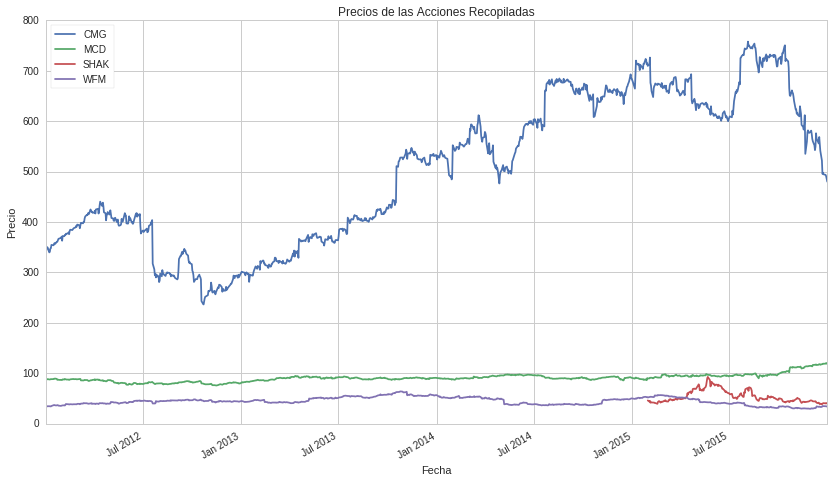

In [149]:
# grafica
prices.plot()
plt.title("Precios de las Acciones Recopiladas")
plt.ylabel("Precio")
plt.xlabel("Fecha");

Las mismas funciones estadísticas de nuestras interacciones con la Serie resurgen aquí con la adición del parámetro del eje. Al especificar el eje, le decimos a los pandas que calculen la función deseada a lo largo de las filas (eje = 0) o las columnas (eje = 1). Podemos calcular fácilmente la media de cada columna así:

In [150]:
# calculamos la media de cada columna
prices.mean(axis=0)

CMG     501.637439
MCD      90.433999
SHAK     53.530670
WFM      44.423044
dtype: float64

Además de la desviación estándar:

In [151]:
prices.std(axis = 0)

CMG     146.697204
MCD       7.672937
SHAK     11.948689
WFM       7.550077
dtype: float64

Una vez más, la función describe () nos proporcionará estadísticas de resumen de nuestros datos si preferimos tener todas nuestras estadísticas típicas en una visual conveniente en lugar de calcularlas individualmente.

In [152]:
# estadisticas de resumen
prices.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.637439,90.433999,53.530670,44.423044
std,146.697204,7.672937,11.948689,7.550077
min,236.240000,75.387000,38.205000,29.150000
25%,371.605000,86.798000,NaN,38.555250
50%,521.280000,90.062000,NaN,43.928000
75%,646.753750,93.976250,NaN,50.766000
max,757.770000,120.030000,92.470000,63.732000


Podemos escalar y agregar escalares a nuestro DataFrame, como podría sospechar después de tratar con Series. Esto funciona nuevamente en cuanto a los elementos.

In [153]:
# multiplicacion escalar
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,631.960,123.262,NaN,15.576
2012-01-04 00:00:00+00:00,647.480,124.332,NaN,17.300
2012-01-05 00:00:00+00:00,649.980,125.052,NaN,18.514
2012-01-06 00:00:00+00:00,647.900,126.384,NaN,18.638
2012-01-09 00:00:00+00:00,629.044,124.684,NaN,18.646


Aquí usamos el método pct_change () para obtener un DataFrame de los retornos multiplicativos de los valores que estamos viendo.

In [154]:
# retornos multiplicativos de los valores que estamos viendo
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.022758,0.006176,NaN,0.026290
2012-01-05 00:00:00+00:00,0.003584,0.004130,NaN,0.018039
2012-01-06 00:00:00+00:00,-0.002972,0.007609,NaN,0.001810
2012-01-09 00:00:00+00:00,-0.027018,-0.009638,NaN,0.000117
2012-01-10 00:00:00+00:00,0.003470,0.000401,NaN,-0.002884


Si utilizamos nuestros métodos de estadísticas para estandarizar los retornos, un procedimiento común al examinar los datos, entonces podemos tener una mejor idea de cómo se mueven todos ellos en relación con el otro en la misma escala.

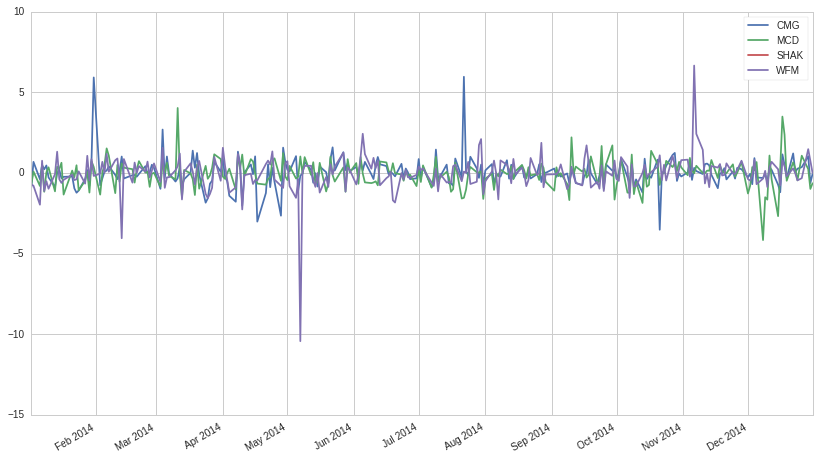

In [157]:
# grafica
# estandarizamos los retornos
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

Esto hace que sea más fácil comparar el movimiento de las diferentes series de tiempo contenidas en nuestro ejemplo.

Los medios de balanceo y las desviaciones estándar también funcionan con DataFrames.

In [158]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


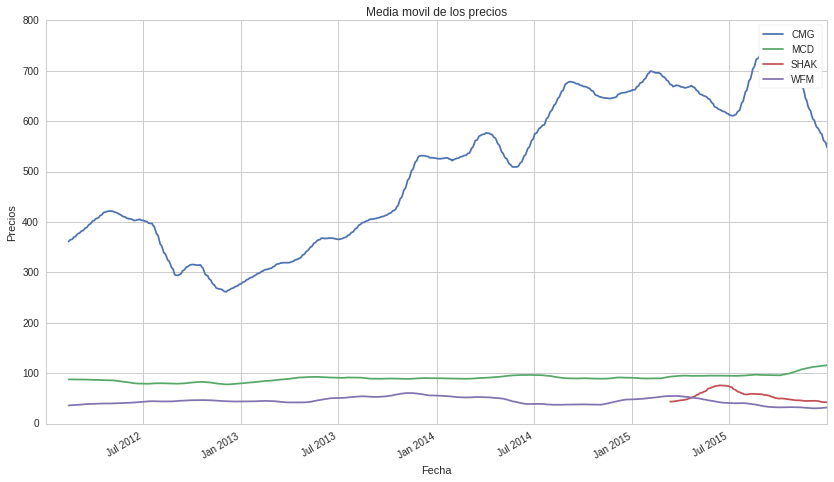

In [160]:
# grafica
rolling_mean.plot()
plt.title("Media movil de los precios")
plt.xlabel("Fecha")
plt.ylabel("Precios")
plt.legend();

Para obtener una lista completa de todos los métodos integrados en DataFrames, consulte la documentación. [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Próximos pasos

Administrar datos se vuelve mucho más fácil cuando se trata con pandas, aunque esta ha sido una introducción muy general. Hay muchas más herramientas dentro del paquete que puede descubrir al intentar hacer que sus datos hagan exactamente lo que usted desea. Si prefiere leer más sobre las capacidades adicionales de los pandas, consulte la documentación. [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*